In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

In [2]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  CMDData_Pandas05032025A.csv


,Month,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,Jan-23,17651848.71,1644493.176,4.098372,14.959325,34508759
1,Feb-23,15151650.49,1476316.144,4.364071,16.110931,33321140
2,Mar-23,19017841.88,2134989.924,4.434172,15.505810,40815447
3,Apr-23,18199985.98,2179526.092,4.419683,14.694396,35914360
4,May-23,18731832.87,2239618.683,4.513426,15.427396,38302147
5,Jun-23,18710578.57,2333943.272,4.315955,14.888089,38897667
6,Jul-23,21479823.81,2464073.800,4.349031,13.781183,39621919
7,Aug-23,24151259.39,2806058.912,4.222706,13.074114,41783822
8,Sep-23,21043264.92,2271027.387,4.099121,14.208968,34501584
9,Oct-23,22125962.04,2285036.818,3.519936,14.354569,34081456


---
### Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library).

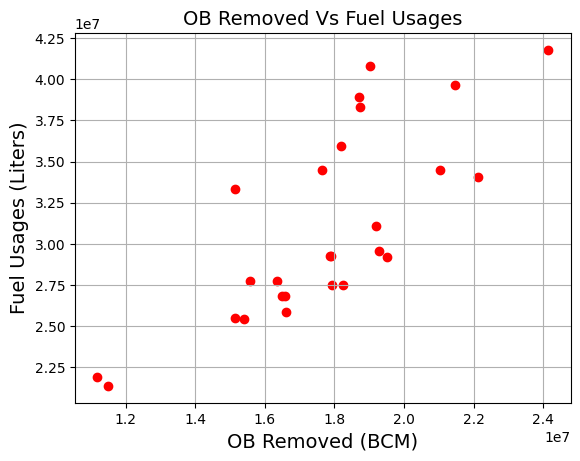

In [3]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

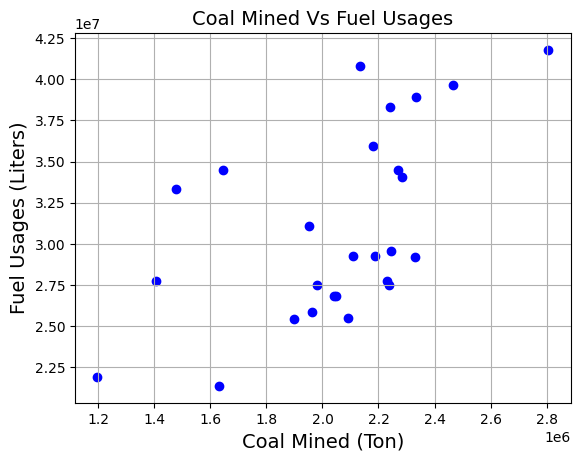

In [4]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

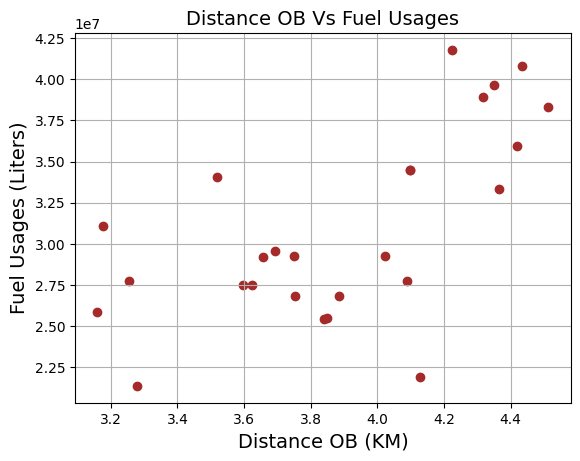

In [5]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

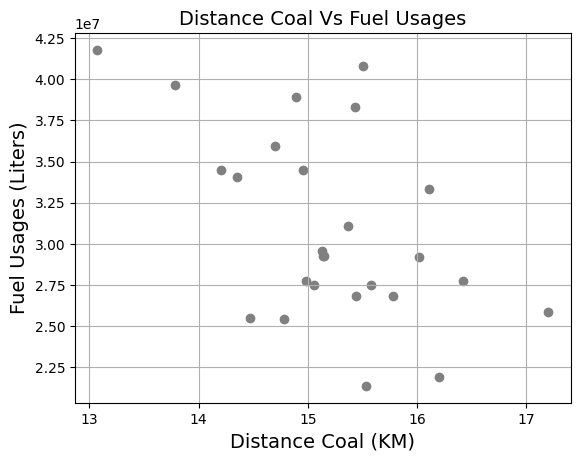

In [6]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

In [7]:
dataset = dataset.drop(['Month'], axis=1)

In [8]:
correlations = dataset.corr()
correlations['Fuel']

OB (Bcm)              0.763621
Coal (Ton)            0.567692
Distance OB (KM)      0.641847
Distance Coal (KM)   -0.531202
Fuel                  1.000000
Name: Fuel, dtype: float64

From Linearity test above we found that OB Removed, Coal Mined, OB Distance have linier relantionship with Fuel Usages

In [9]:
from sklearn import linear_model
import statsmodels.api as sm

In [10]:
x = dataset[['OB (Bcm)','Coal (Ton)', 'Distance OB (KM)']]
y = dataset['Fuel']
 
# Using sklearn

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: -->', regr.intercept_.round(3))
print('Coefficients: -->', regr.coef_.round(3))

# Using statsmodels

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: --> -19368906.56
Coefficients: --> [ 1.7840000e+00 -4.9530000e+00  7.4143965e+06]
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     42.50
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           2.52e-09
Time:                        11:37:23   Log-Likelihood:                -416.09
No. Observations:                  26   AIC:                             840.2
Df Residuals:                      22   BIC:                             845.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [12]:
x = dataset[['OB (Bcm)','Coal (Ton)', 'Distance OB (KM)', 'Distance Coal (KM)']]
y = dataset['Fuel']
 
# Using sklearn

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: -->', regr.intercept_.round(3))
print('Coefficients: -->', regr.coef_.round(3))

# Using statsmodels

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: --> -29861868.937
Coefficients: --> [ 1.81400000e+00 -4.41100000e+00  7.69653686e+06  5.09937102e+05]
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     31.11
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.49e-08
Time:                        11:43:18   Log-Likelihood:                -415.84
No. Observations:                  26   AIC:                             841.7
Df Residuals:                      21   BIC:                             848.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------